In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link='https://drive.google.com/open?id=1W072S9t1fx6TfqbNa4Kbhi0eyHyILQwr'

In [0]:
fluff, id = link.split('=')
print(id) # Verify that you have everything after '='

1W072S9t1fx6TfqbNa4Kbhi0eyHyILQwr


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('GOOG.csv')  

In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [0]:
df = pd.read_csv('GOOG.csv')

In [0]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,778.809998,789.630005,775.799988,786.140015,786.140015,1657300
1,2017-01-04,788.359985,791.340027,783.159973,786.900024,786.900024,1073000
2,2017-01-05,786.080017,794.479980,785.020020,794.020020,794.020020,1335200
3,2017-01-06,795.260010,807.900024,792.203979,806.150024,806.150024,1640200
4,2017-01-09,806.400024,809.966003,802.830017,806.650024,806.650024,1272400


In [0]:
L=len(df)
print("Length of Dataframe:",L)

Length of Dataframe: 251


In [0]:
Hi = np.array([df.iloc[:,2]])
Low = np.array([df.iloc[:,3]])
Close = np.array([df.iloc[:,4]])

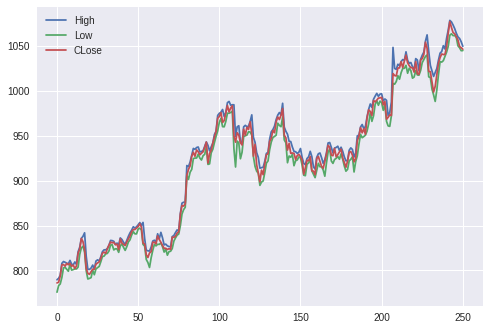

In [0]:
plt.figure(1)
H, = plt.plot(Hi[0,:])
L, = plt.plot(Low[0,:])
C, = plt.plot(Close[0,:])
plt.legend([H,L,C],["High","Low","CLose"])
plt.show(block=False)

In [0]:
X = np.concatenate([Hi,Low],axis=0)
print(X.shape)
X =np.transpose(X)

(2, 251)


In [0]:
y = Close
y = np.transpose(y)

In [0]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [0]:
scaler1 = MinMaxScaler()
scaler1.fit(y)
y = scaler1.transform(y)

In [0]:
X = np.reshape(X,(X.shape[0],1,X.shape[1]))
print(X.shape)

(251, 1, 2)


In [0]:
model = Sequential([
LSTM(100,activation='tanh',input_shape=(1,2),recurrent_activation='hard_sigmoid'),
Dense(1),
])
# Model Summary
model.summary()
# Compiling the Model
model.compile(loss="mean_squared_error",optimizer='adam',metrics=["mean_absolute_error"])
# Fitting the Model
model.fit(X,y,epochs=15,batch_size= 1,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               41200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 41,301
Trainable params: 41,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
251/251 [==============================] - 1s 5ms/step - loss: 0.0353 - mean_absolute_error: 0.1282
Epoch 2/15
251/251 [==============================] - 1s 3ms/step - loss: 0.0015 - mean_absolute_error: 0.0297
Epoch 3/15
251/251 [==============================] - 1s 3ms/step - loss: 2.9929e-04 - mean_absolute_error: 0.0138
Epoch 4/15
251/251 [==============================] - 1s 3ms/step - loss: 2.8392e-04 - mean_absolute_error: 0.0134
Epoch 5/15
251/251 [==============================] - 1s 3ms/step - loss: 2.8245e-

In [0]:
predictions=model.predict(X,verbose=1)
print(predictions[:5])

251/251 [==============================] - 0s 373us/step
[[-0.00188464]
 [ 0.01364709]
 [ 0.02197996]
 [ 0.05635858]
 [ 0.07830166]]


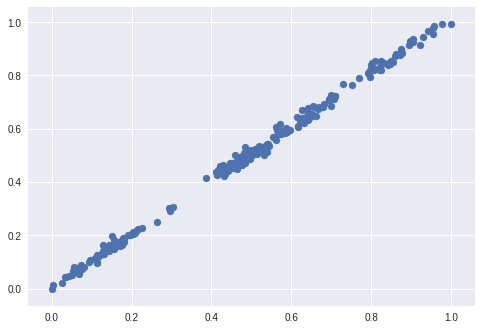

In [0]:
plt.figure(2)
plt.scatter(y,predictions)
plt.show(block=False)

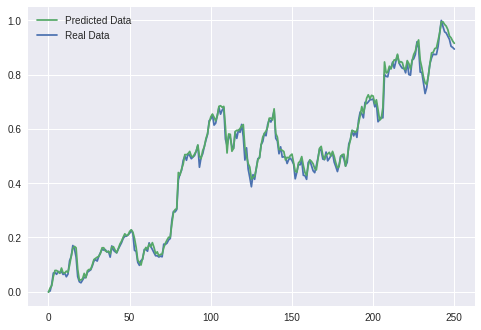

In [0]:
plt.figure(3)
Test, = plt.plot(y)
Predict, = plt.plot(predictions)
plt.legend([Predict,Test],["Predicted Data","Real Data"])
plt.show()